In [3]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import genfromtxt
import json
import os

In [6]:
labelsize = 12
titlesize = 15
valsize = 10

In [ ]:
x = [0,1,2,3,4,5]
y = [0,0,1,1,2,3]
z = [1,2,3,3,2,1]
plt.plot(x, y)
plt.savefig(f"fig.png")

plt.plot(x, z)
plt.show()

In [4]:
stri = open('num.txt.txt', 'r')
sli = stri.read().split()
f1s = []
accs = []
sal, ted = False, False
tom = False
for i in sli:
    if sal:
        f1s.append(float(i[:-1]))
        sal = False
        ted = False
    else:
        if ted:
            sal = True
        else:
            if i == 'F1':
                ted = True
                sal = False

    if tom:
        accs.append(float(i[:-1]))
        tom = False
    else:
        if i == 'right.Accuracy:':
            tom = True

print(np.average(f1s))
print(np.average(accs))

0.8413084900944225
0.8952887144958084


In [ ]:
# Multimodel

NFLTimes = np.loadfile()
DFLTimes = np.loadfile()

#TIMES:
timePerVStd = None # Time per epoch per vehicle standard method. 
avgTimePerVNFL = np.average(NFLTimes) # Average time per vehicle Normal Fed Learning
maxTimePerVNFL = np.max(NFLTimes) # Normal time per vehicle Normal Fed Learning

avgTimePerVDFL = np.average(DFLTimes) # Average time per vehicle Distributed Fed Learning
maxTimePerVDFL = np.max(DFLTimes) # Normal time per vehicle Distributed Fed Learning



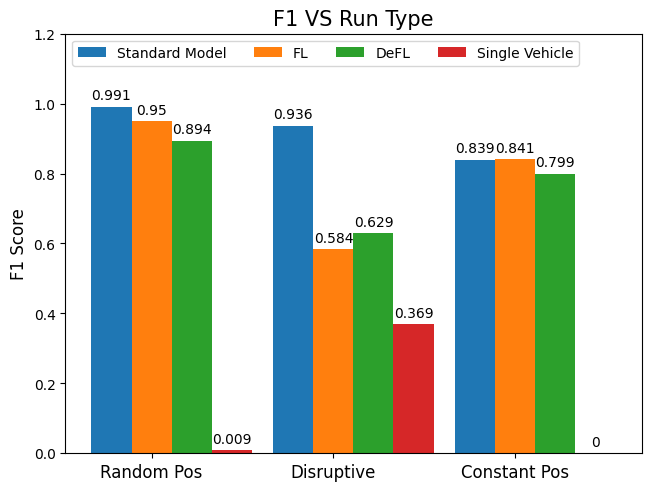

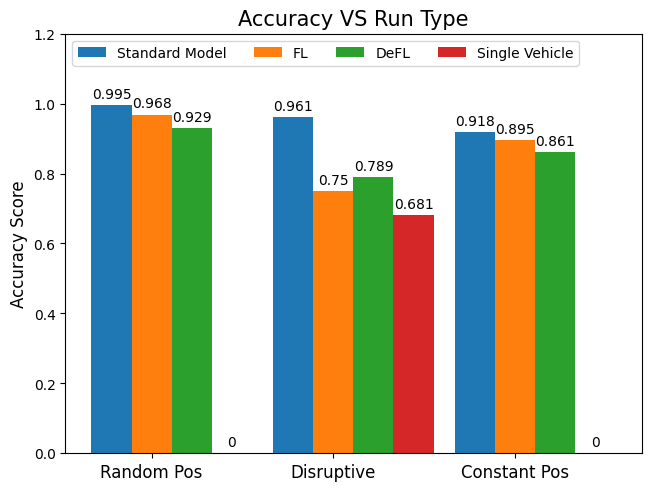

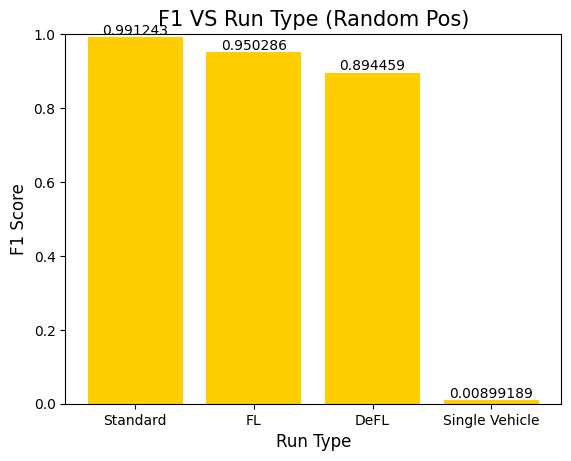

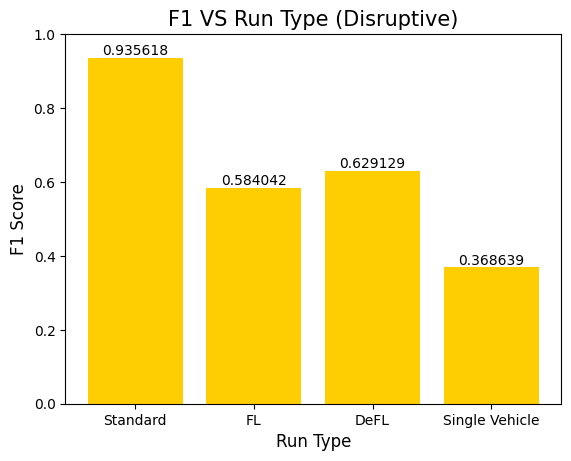

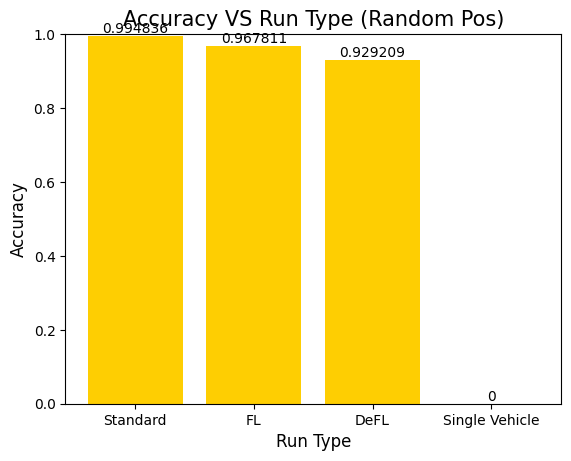

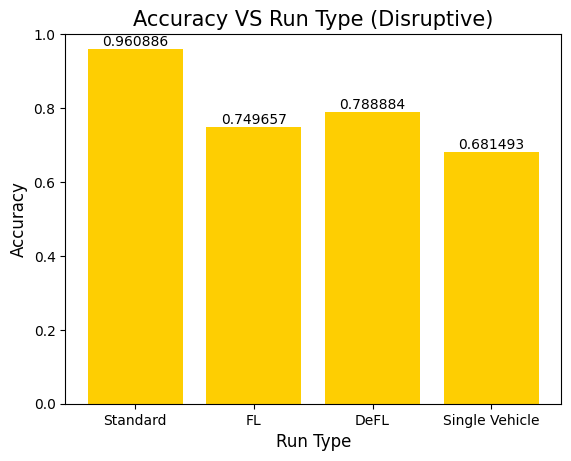

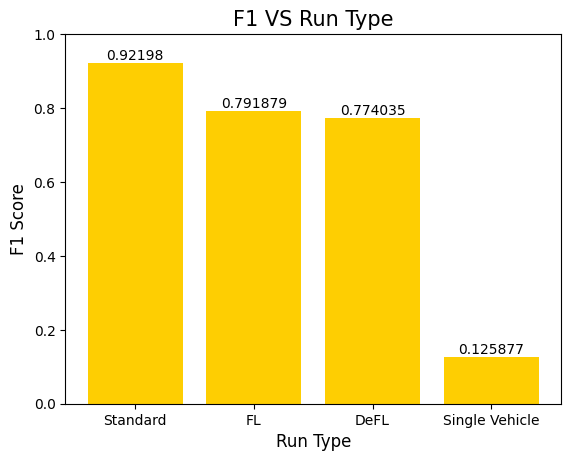

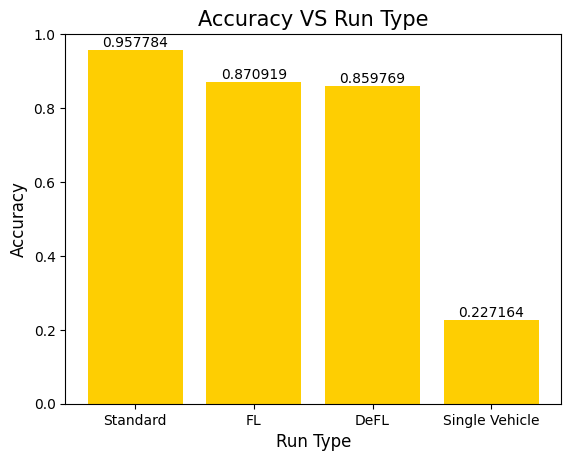

In [9]:
RandomposF1 = [0.9912427232235695, 0.9502858469590124, 0.894459069547716, 0.008991894630192501]
RandomposAcc = [0.9948362639652492, 0.9678110176282051, 0.9292087740384624, 0.0]
DisruptiveF1 = [0.9356181223063138, 0.5840418357710631, 0.6291294992339264, 0.3686390532544379]
DisruptiveAcc = [0.9608859962208692, 0.7496571685662865, 0.7888840144230772, 0.6814925373134328]
ConstposF1 = [0.8390779762072518,0.8413084900944225,0.7985172638490227,0] # Just needs Federated results
ConstposAcc = [0.9176286726401334,0.8952887144958084,0.8612136217948715,0] # Just needs Federated results
SumF1 = [(RandomposF1[0]+DisruptiveF1[0]+ConstposF1[0])/3, (RandomposF1[1]+DisruptiveF1[1]+ConstposF1[1])/3, (RandomposF1[2]+DisruptiveF1[2]+ConstposF1[2])/3 ,(RandomposF1[3]+DisruptiveF1[3]+ConstposF1[3])/3]
SumAcc = [(RandomposAcc[0]+DisruptiveAcc[0]+ConstposAcc[0])/3, (RandomposAcc[1]+DisruptiveAcc[1]+ConstposAcc[1])/3, (RandomposAcc[2]+DisruptiveAcc[2]+ConstposAcc[2])/3 ,(RandomposAcc[3]+DisruptiveAcc[3]+ConstposAcc[3])/3]
StandF1 = [RandomposF1[0], DisruptiveF1[0], ConstposF1[0]]
FlF1 = [RandomposF1[1], DisruptiveF1[1], ConstposF1[1]]
DfLF1 = [RandomposF1[2], DisruptiveF1[2], ConstposF1[2]]
VeF1 = [RandomposF1[3], DisruptiveF1[3], ConstposF1[3]]

StandAcc = [RandomposAcc[0], DisruptiveAcc[0], ConstposAcc[0]]
FlAcc = [RandomposAcc[1], DisruptiveAcc[1], ConstposAcc[1]]
DfLAcc = [RandomposAcc[2], DisruptiveAcc[2], ConstposAcc[2]]
VeAcc = [RandomposAcc[3], DisruptiveAcc[3], ConstposAcc[3]]

Tests = ("Random Pos", "Disruptive", "Constant Pos")
F1Vals = {
    'Standard Model' : [round(i, 3) for i in StandF1],
    'FL' : [round(i, 3) for i in FlF1],
    'DeFL': [round(i, 3) for i in DfLF1],
    'Single Vehicle' : [round(i, 3) for i in VeF1]
}
AccVals = {
    'Standard Model' : [round(i, 3) for i in StandAcc],
    'FL' : [round(i, 3) for i in FlAcc],
    'DeFL': [round(i, 3) for i in DfLAcc],
    'Single Vehicle' : [round(i, 3) for i in VeAcc]
}

#F1
x = np.arange(len(Tests))  # the label locations
width = 0.22  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in F1Vals.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('F1 Score', fontsize=labelsize)
ax.set_title('F1 VS Run Type', fontsize=titlesize)
ax.set_xticks(x + width, Tests, fontsize=labelsize)
ax.legend(loc='upper left', ncols=4)
ax.set_ylim(0, 1.2)

plt.show()

#Accuracy
x = np.arange(len(Tests))  # the label locations
width = 0.22  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in AccVals.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy Score', fontsize = labelsize)
ax.set_title('Accuracy VS Run Type', fontsize=titlesize)
ax.set_xticks(x + width, Tests, fontsize=labelsize)
ax.legend(loc='upper left', ncols=4)
ax.set_ylim(0, 1.2)

plt.show()

#Random Pos
ted = plt.bar(['Standard', 'FL', 'DeFL', 'Single Vehicle'], RandomposF1, color = '#FECE02')
plt.title('F1 VS Run Type (Random Pos)', fontsize=titlesize)
plt.xlabel('Run Type', fontsize=labelsize)
plt.ylabel('F1 Score', fontsize=labelsize)
plt.gca().set_ylim(0,1)
plt.gca().bar_label(ted, fontsize=valsize)
plt.show()

#Disruptive
ted = plt.bar(['Standard', 'FL', 'DeFL', 'Single Vehicle'], DisruptiveF1, color = '#FECE02')
plt.title('F1 VS Run Type (Disruptive)', fontsize=titlesize)
plt.xlabel('Run Type', fontsize=labelsize)
plt.ylabel('F1 Score', fontsize=labelsize)
plt.gca().set_ylim(0,1)
plt.gca().bar_label(ted, fontsize=valsize)
plt.show()

#Random Pos
ted = plt.bar(['Standard', 'FL', 'DeFL', 'Single Vehicle'], RandomposAcc, color = '#FECE02')
plt.title('Accuracy VS Run Type (Random Pos)', fontsize=titlesize)
plt.xlabel('Run Type', fontsize=labelsize)
plt.ylabel('Accuracy', fontsize=labelsize)
plt.gca().set_ylim(0,1)
plt.gca().bar_label(ted, fontsize=valsize)
plt.show()

#Disruptive
ted = plt.bar(['Standard', 'FL', 'DeFL', 'Single Vehicle'], DisruptiveAcc, color = '#FECE02')
plt.title('Accuracy VS Run Type (Disruptive)', fontsize=titlesize)
plt.xlabel('Run Type', fontsize=labelsize)
plt.ylabel('Accuracy', fontsize=labelsize)
plt.gca().set_ylim(0,1)
plt.gca().bar_label(ted, fontsize=valsize)
plt.show()


#Combine
ted = plt.bar(['Standard', 'FL', 'DeFL', 'Single Vehicle'], SumF1, color = '#FECE02')
plt.title('F1 VS Run Type', fontsize=titlesize)
plt.xlabel('Run Type', fontsize=labelsize)
plt.ylabel('F1 Score', fontsize=labelsize)
plt.gca().set_ylim(0,1)
plt.gca().bar_label(ted, fontsize=valsize)
plt.show()

ted = plt.bar(['Standard', 'FL', 'DeFL', 'Single Vehicle'], SumAcc, color = '#FECE02')
plt.title('Accuracy VS Run Type', fontsize=titlesize)
plt.xlabel('Run Type', fontsize=labelsize)
plt.ylabel('Accuracy', fontsize=labelsize)
plt.gca().set_ylim(0,1)
plt.gca().bar_label(ted, fontsize=valsize)
plt.show()

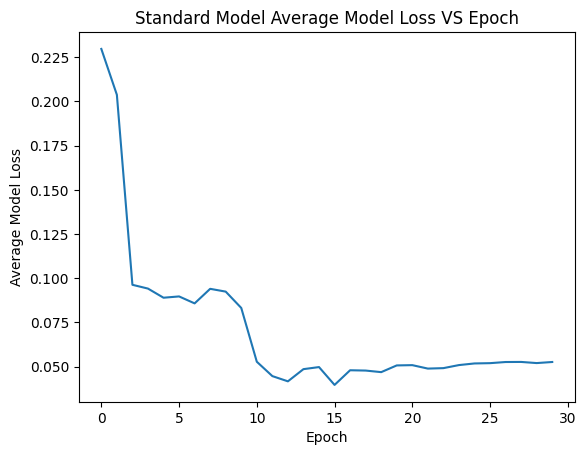

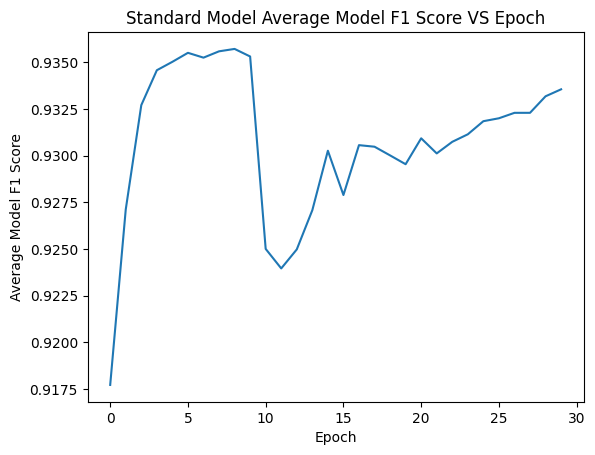

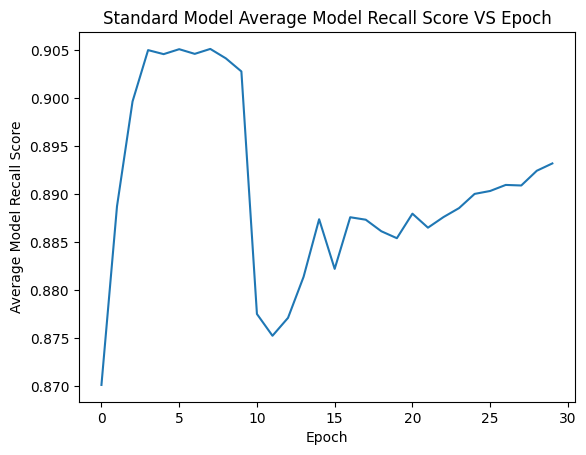

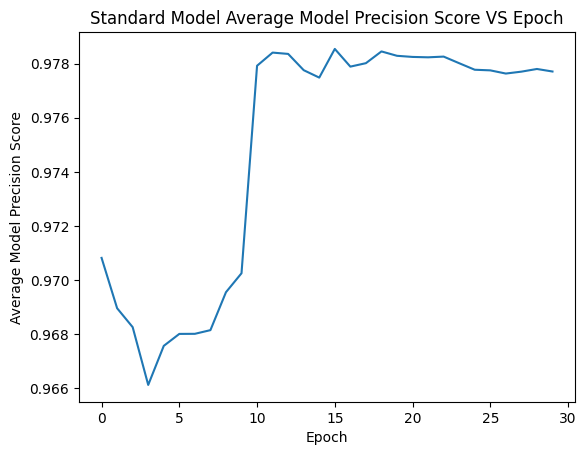

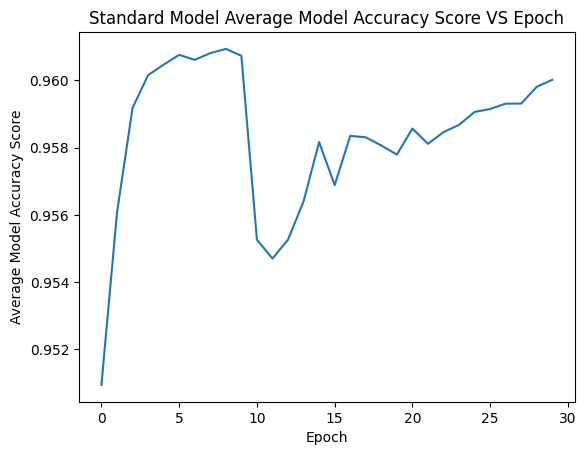

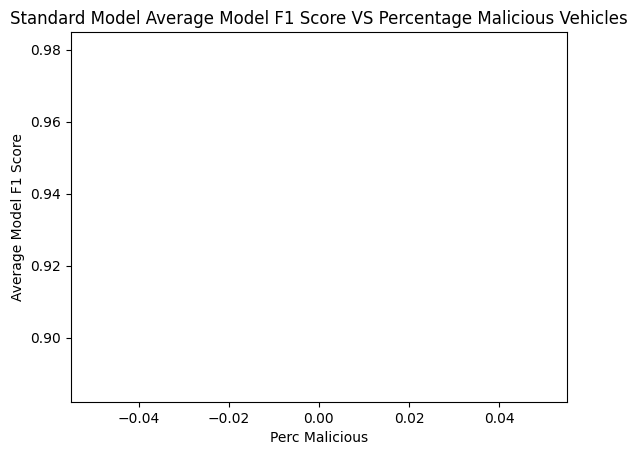

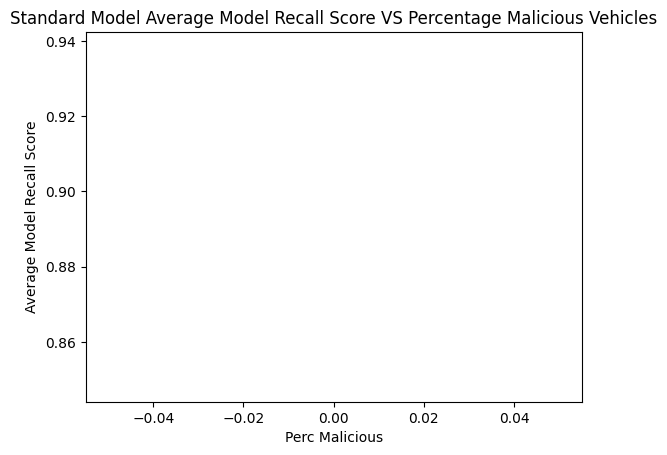

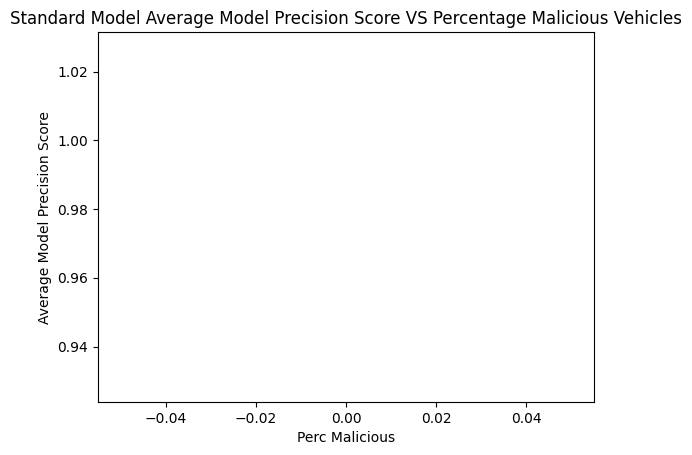

In [ ]:
# Individual Module Run
path = "out/Normal/Disruptive-30-0.01/"
plotPath = f"{path}plot/"
if not os.path.exists(plotPath):
    os.makedirs(plotPath)
modelType = "Standard Model" # "Trad. FL" # "Stnd. Model"

#VS EPOCHS
avgLosses = genfromtxt(f'{path}avgLossVEpoch.csv',delimiter=',')
avgF1s = genfromtxt(f'{path}avgF1VEpoch.csv', delimiter=',')
avgRecalls = genfromtxt(f'{path}avgRecallVEpoch.csv', delimiter=',')
avgPrecisions = genfromtxt(f'{path}avgPrecisionVEpoch.csv', delimiter=',')
avgAccs = genfromtxt(f'{path}avgAccuracyVEpoch.csv', delimiter=',')

#VS PERC EVIL
others = json.load(open(f'{path}ExtraData.json', 'r'))
finalF1s = others['F1 V PercEvil']
finalRecalls = others['Recall V PercEvil']
finalPrecisions = others['Precision V PercEvil']
finalAccs = others['Accuracy V PercEvil']
maxVeTime = others['Max Per-Vehicle Time']
avgVeTime = others['Avg Per-Vehicle Time']
epochTotTime = others['Total Time Per Epoch']

plt.plot(avgLosses[1:,0], avgLosses[1:,1])
plt.xlabel("Epoch", fontsize=labelsize)
plt.ylabel("Average Model Loss", fontsize=labelsize)
plt.title(f"{modelType} Average Model Loss VS Epoch", fontsize=titlesize)
plt.savefig(f"{plotPath}LossVEpoch.png")
plt.show()

plt.plot(avgF1s[1:,0], avgF1s[1:,1])
plt.xlabel("Epoch", fontsize=labelsize)
plt.ylabel("Average Model F1 Score", fontsize=labelsize)
plt.title(f"{modelType} Average Model F1 Score VS Epoch", fontsize=titlesize)
plt.savefig(f"{plotPath}F1VEpoch.png")
plt.show()

plt.plot(avgRecalls[1:,0], avgRecalls[1:,1])
plt.xlabel("Epoch", fontsize=labelsize)
plt.ylabel("Average Model Recall Score", fontsize=labelsize)
plt.title(f"{modelType} Average Model Recall Score VS Epoch", fontsize=titlesize)
plt.savefig(f"{plotPath}RecallVEpoch.png")
plt.show()

plt.plot(avgPrecisions[1:,0], avgPrecisions[1:,1])
plt.xlabel("Epoch", fontsize=labelsize)
plt.ylabel("Average Model Precision Score", fontsize=labelsize)
plt.title(f"{modelType} Average Model Precision Score VS Epoch", fontsize=titlesize)
plt.savefig(f"{plotPath}PrecisionVEpoch.png")
plt.show()

plt.plot(avgAccs[1:,0], avgAccs[1:,1])
plt.xlabel("Epoch", fontsize=labelsize)
plt.ylabel("Average Model Accuracy Score", fontsize=labelsize)
plt.title(f"{modelType} Average Model Accuracy Score VS Epoch", fontsize=titlesize)
plt.savefig(f"{plotPath}AccuracyVEpoch.png")
plt.show()

plt.plot(finalF1s[0], finalF1s[1])
plt.xlabel("Perc Malicious", fontsize=labelsize)
plt.ylabel("Average Model F1 Score", fontsize=labelsize)
plt.title(f"{modelType} Average Model F1 Score VS Percentage Malicious Vehicles", fontsize=titlesize)
plt.savefig(f"{plotPath}F1VperEvil.png")
plt.show()

plt.plot(finalRecalls[0], finalRecalls[1])
plt.xlabel("Perc Malicious", fontsize=labelsize)
plt.ylabel("Average Model Recall Score", fontsize=labelsize)
plt.title(f"{modelType} Average Model Recall Score VS Percentage Malicious Vehicles", fontsize=titlesize)
plt.savefig(f"{plotPath}RecallVperEvil.png")
plt.show()

plt.plot(finalPrecisions[0], finalPrecisions[1])
plt.xlabel("Perc Malicious", fontsize=labelsize)
plt.ylabel("Average Model Precision Score", fontsize=labelsize)
plt.title(f"{modelType} Average Model Precision Score VS Percentage Malicious Vehicles", fontsize=titlesize)
plt.savefig(f"{plotPath}PrecisionVperEvil.png")
plt.show()